<a href="https://colab.research.google.com/github/shivangipandey/langchain-rag-graph-gpt-chatbot/blob/main/setup_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import urllib.request
from os import getcwd

!mkdir dependency

url = "https://raw.githubusercontent.com/shivangipandey/langchain-rag-graph-gpt-chatbot/main/requirements.txt"
directory = getcwd()
filename = directory + '/requirements.txt'

urllib.request.urlretrieve(url, filename)

('/content/requirements.txt', <http.client.HTTPMessage at 0x7dd0ba12f970>)

In [ ]:
!pip install -r requirements.txt

In [60]:
#Add OpenAI related enviroment variables

import os

os.environ["AZURE_OPENAI_API_KEY"]="$OPEN_AI_KEY"
os.environ["OPENAI_API_KEY"]="$OPEN_AI_KEY"
os.environ["OPENAI_API_BASE"]="$BaseURL"
os.environ["OPENAI_API_VERSION"]="2023-09-01-preview"
os.environ["AZURE_OPENAI_CHAT_DEPLOYMENT_NAME"]="gpt-35-turbo-openai"

With this in place, let's test the connectivity with openAI model

In [61]:
#Basic chatmodel testing

import dotenv
import os
from langchain_openai import AzureChatOpenAI
from langchain.schema.messages import HumanMessage, SystemMessage

dotenv.load_dotenv()

chat_model = AzureChatOpenAI(
        base_url = os.getenv("OPENAI_API_BASE"),
        max_tokens = 100,
        validate_base_url=False,
        temperature=0)

#Gives Valid Answer
messages = [
    SystemMessage(
        content="""You're an assistant knowledgeable about
        healthcare. Only answer healthcare-related questions."""
    ),
    HumanMessage(content="What is Medicaid managed care?"),
]

print(chat_model.invoke(messages))

content='Medicaid managed care is a system in which states contract with managed care organizations (MCOs) to provide healthcare services to Medicaid beneficiaries. These MCOs are responsible for coordinating and delivering healthcare services to enrollees in exchange for a fixed monthly payment per enrollee. Medicaid managed care aims to improve access to care, enhance quality, and control costs for Medicaid beneficiaries.'


# Set Up a Neo4j Graph Database

Create a Neo4j Account and AuraDB Instance

To get started using Neo4j, you can create a free [Neo4j AuraDB account](https://neo4j.com/cloud/aura-free/). The landing page should look something like this:

Screenshot_2024-01-10_at_9.52.26_AM.13dfb78c613b.avif


Click the Start Free button and create an account. Once you’re signed in, you should see the Neo4j Aura console:

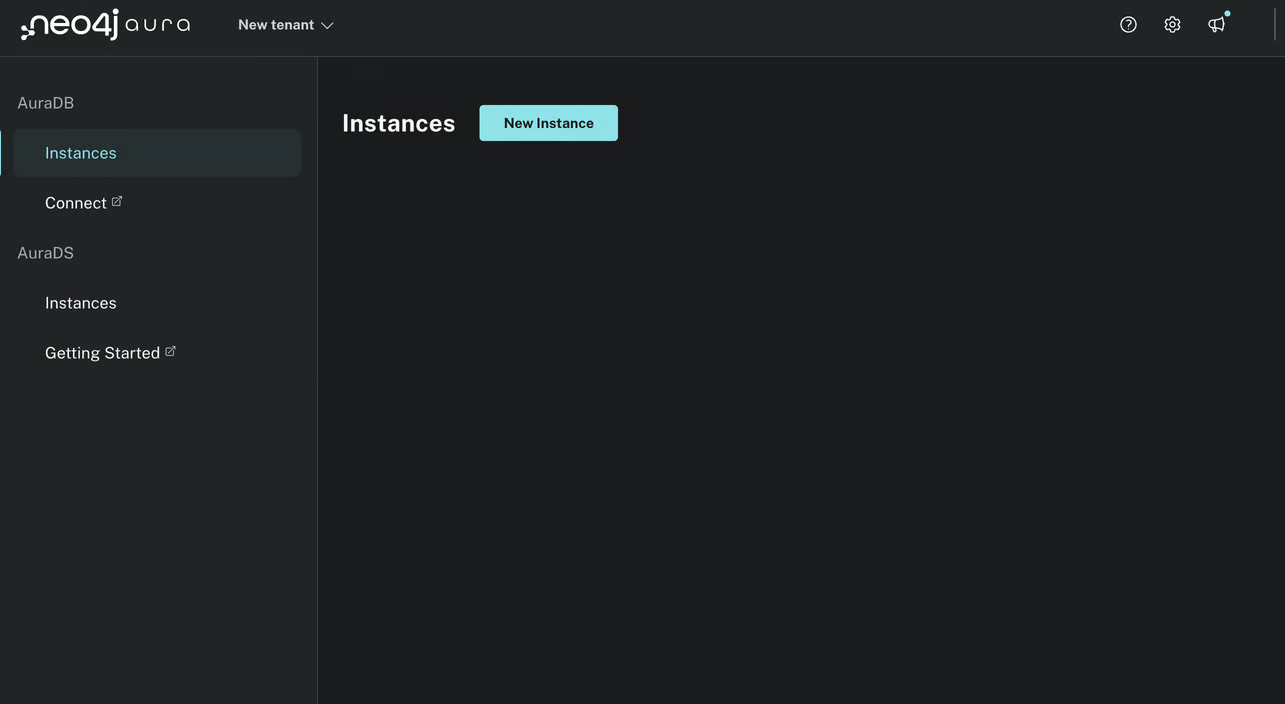

Click New Instance and create a free instance. A modal should pop up similar to this:

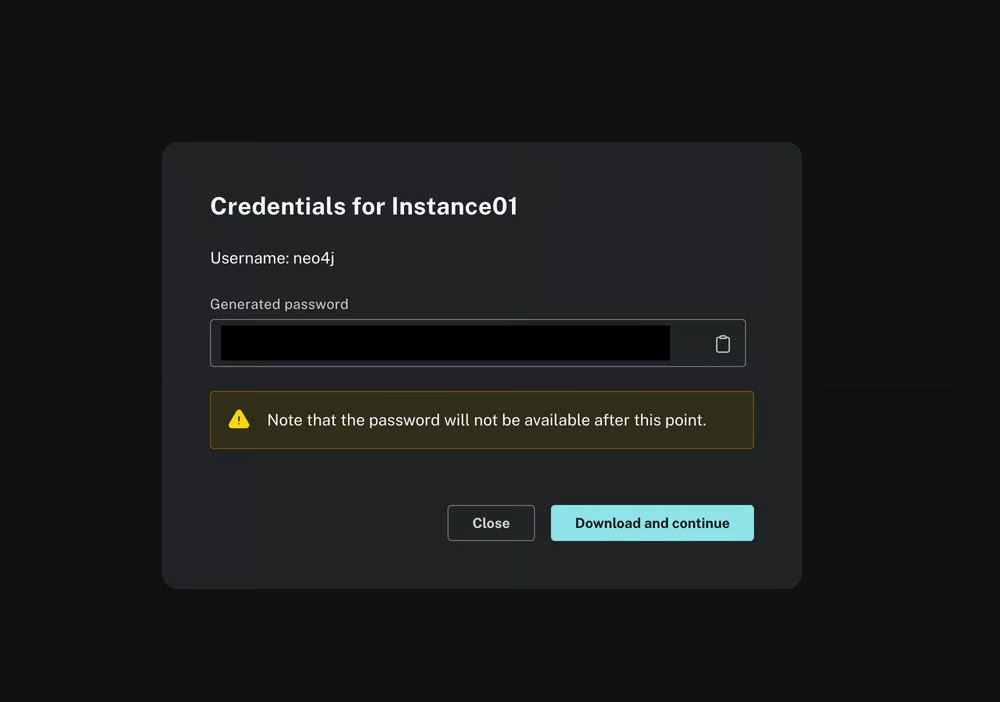

After you click Download and Continue, your instance should be created and a text file containing the Neo4j database credentials should download. Once the instance is created, you’ll see its status is Running. There should be no nodes or relationships yet:

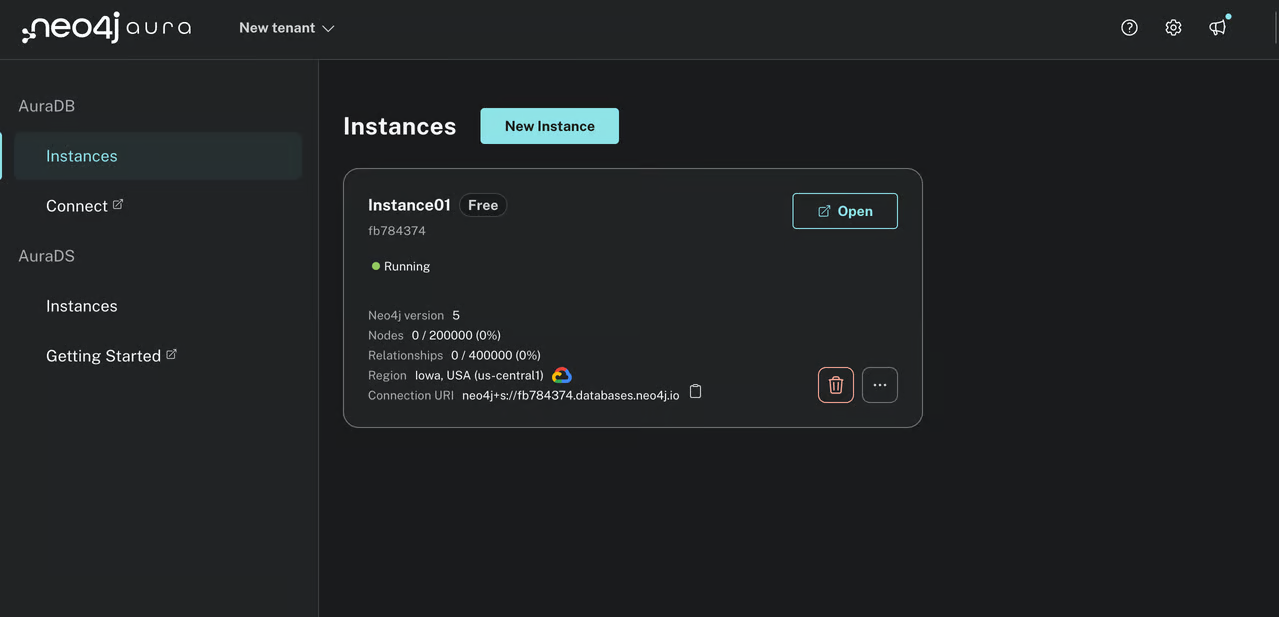

It might take few minutes for the instance to come in 'running' state. Once it does, click on 'Open', which will land you to query tab. If the screen doesn't take password, try disconnecting your vpn and then retrying.

Next, open the text file you downloaded with your Neo4j credentials and copy the NEO4J_URI, NEO4J_USERNAME, and NEO4J_PASSWORD, then set into your env variables :


In [50]:
#neo4j related
os.environ["NEO4J_URI"]="$URI"
os.environ["NEO4J_USERNAME"]="neo4j"
os.environ["NEO4J_PASSWORD"]="$Password"

#raw data related
os.environ["HOSPITALS_CSV_PATH"]="https://raw.githubusercontent.com/shivangipandey/langchain-rag-graph-gpt-chatbot/main/hospitals.csv"
os.environ["PAYERS_CSV_PATH"]="https://raw.githubusercontent.com/shivangipandey/langchain-rag-graph-gpt-chatbot/main/payers.csv"
os.environ["PHYSICIANS_CSV_PATH"]="https://raw.githubusercontent.com/shivangipandey/langchain-rag-graph-gpt-chatbot/main/physicians.csv"
os.environ["PATIENTS_CSV_PATH"]="https://raw.githubusercontent.com/shivangipandey/langchain-rag-graph-gpt-chatbot/main/patients.csv"
os.environ["VISITS_CSV_PATH"]="https://raw.githubusercontent.com/shivangipandey/langchain-rag-graph-gpt-chatbot/main/visits.csv"
os.environ["REVIEWS_CSV_PATH"]="https://raw.githubusercontent.com/shivangipandey/langchain-rag-graph-gpt-chatbot/main/reviews.csv"

In [62]:
#test connection with neo4j auraDB

import os
from langchain_community.graphs import Neo4jGraph
from langchain.chains import GraphCypherQAChain
from langchain.prompts import PromptTemplate

graph = Neo4jGraph(
    url=os.getenv("NEO4J_URI"),
    username=os.getenv("NEO4J_USERNAME"),
    password=os.getenv("NEO4J_PASSWORD"),
)

graph.refresh_schema()